## Part3, Task1

Implement the RNN without using torch.nn.RNN and torch.nn.LSTM.

In this default case, I implement the RNN model with the Palindromes' length of **11**. (T = 11)

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import time
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.argv=['']
del sys

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F

from dataset import PalindromeDataset
from vanilla_rnn import VanillaRNN

In [3]:
def accuracy(outputs, batch_targets):
    """
    Computes the prediction accuracy, i.e., the average of correct predictions
    of the network.
    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        labels: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding of ground-truth labels
    Returns:
        accuracy: scalar float, the accuracy of predictions.
    """

    _, predicted = torch.max(outputs.data, 1)
    total = batch_targets.size(0)
    correct = (predicted == batch_targets).sum().item()
    accuracy = 100.0 * correct / total
    
    return accuracy

In [4]:
def train(config, input_length):

    # Initialize the model that we are going to use
    model = VanillaRNN(input_length, config.input_dim, config.num_hidden, config.num_classes, config.batch_size)  # fixme

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Initialize the dataset and data loader (leave the +1)
    dataset = PalindromeDataset(input_length+1)
    data_loader = DataLoader(dataset, config.batch_size, num_workers=1)

    # Setup the loss and optimizer
    criterion = nn.CrossEntropyLoss()  # fixme
    optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)  # fixme
    
    losses = []
    accuracies = []
    loss = 0.0

    for step, (batch_inputs, batch_targets) in enumerate(data_loader):

        # Add more code here ...
        optimizer.zero_grad() 
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)   

        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()

        # the following line is to deal with exploding gradients
        torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)

        # Add more code here ...

        loss += loss.item()   # fixme
        accu = 0.0  # fixme
        

        if step % 10 == 0:
            # print acuracy/loss here
            print('[step: %5d] loss: %.4f' %
                          (step, loss / 10))
            losses.append(loss / 10)
            loss = 0.0
            accu = accuracy(outputs, batch_targets)
            accuracies.append(accu)
            print('Accuracy on training dataset: %.3f %%' % (accu))
            

        if step == config.train_steps:
            # If you receive a PyTorch data-loader error, check this bug report:
            # https://github.com/pytorch/pytorch/pull/9655
            break

    print('Done training.')
    
    return model, losses, accuracies

In [5]:
if __name__ == "__main__":

    # Parse training configuration
    parser = argparse.ArgumentParser()

    # Model params
    parser.add_argument('--input_length', type=int, default=10, help='Length of an input sequence')
    parser.add_argument('--input_dim', type=int, default=1, help='Dimensionality of input sequence')
    parser.add_argument('--num_classes', type=int, default=10, help='Dimensionality of output sequence')
    parser.add_argument('--num_hidden', type=int, default=128, help='Number of hidden units in the model')
    parser.add_argument('--batch_size', type=int, default=128, help='Number of examples to process in a batch')
    parser.add_argument('--learning_rate', type=float, default=0.001, help='Learning rate')
    parser.add_argument('--train_steps', type=int, default=10000, help='Number of training steps')
    parser.add_argument('--max_norm', type=float, default=10.0)

    config = parser.parse_args()

In [6]:
model, losses, accuracies = train(config, config.input_length)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/wangyutong/Repository/store/CS/大三下/深度学习/lab/Assignment2/11611808_assignment2/Part3/vanilla_rnn.py:49: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y = F.softmax(output)
__main__:33: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4605
Accuracy on training dataset: 10.156 %
[step:    10] loss: 0.4604
Accuracy on training dataset: 9.375 %
[step:    20] loss: 0.4571
Accuracy on training dataset: 15.625 %
[step:    30] loss: 0.4589
Accuracy on training dataset: 12.500 %
[step:    40] loss: 0.4526
Accuracy on training dataset: 17.188 %
[step:    50] loss: 0.4447
Accuracy on training dataset: 23.438 %
[step:    60] loss: 0.4395
Accuracy on training dataset: 24.219 %
[step:    70] loss: 0.4288
Accuracy on training dataset: 35.156 %
[step:    80] loss: 0.4200
Accuracy on training dataset: 37.500 %
[step:    90] loss: 0.3960
Accuracy on training dataset: 53.906 %
[step:   100] loss: 0.3962
Accuracy on training dataset: 53.125 %
[step:   110] loss: 0.3838
Accuracy on training dataset: 63.281 %
[step:   120] loss: 0.3888
Accuracy on training dataset: 58.594 %
[step:   130] loss: 0.3718
Accuracy on training dataset: 64.062 %
[step:   140] loss: 0.3654
Accuracy on training dataset: 68.750 %
[step:   15

[step:  1250] loss: 0.3120
Accuracy on training dataset: 89.844 %
[step:  1260] loss: 0.3135
Accuracy on training dataset: 89.062 %
[step:  1270] loss: 0.3150
Accuracy on training dataset: 88.281 %
[step:  1280] loss: 0.2999
Accuracy on training dataset: 96.094 %
[step:  1290] loss: 0.3120
Accuracy on training dataset: 89.844 %
[step:  1300] loss: 0.3180
Accuracy on training dataset: 86.719 %
[step:  1310] loss: 0.3075
Accuracy on training dataset: 92.188 %
[step:  1320] loss: 0.3075
Accuracy on training dataset: 92.188 %
[step:  1330] loss: 0.3225
Accuracy on training dataset: 84.375 %
[step:  1340] loss: 0.3255
Accuracy on training dataset: 82.812 %
[step:  1350] loss: 0.3029
Accuracy on training dataset: 94.531 %
[step:  1360] loss: 0.3090
Accuracy on training dataset: 91.406 %
[step:  1370] loss: 0.3074
Accuracy on training dataset: 92.188 %
[step:  1380] loss: 0.3105
Accuracy on training dataset: 90.625 %
[step:  1390] loss: 0.3180
Accuracy on training dataset: 86.719 %
[step:  14

[step:  2510] loss: 0.3551
Accuracy on training dataset: 68.750 %
[step:  2520] loss: 0.3395
Accuracy on training dataset: 76.562 %
[step:  2530] loss: 0.3550
Accuracy on training dataset: 68.750 %
[step:  2540] loss: 0.3660
Accuracy on training dataset: 63.281 %
[step:  2550] loss: 0.3456
Accuracy on training dataset: 73.438 %
[step:  2560] loss: 0.3597
Accuracy on training dataset: 66.406 %
[step:  2570] loss: 0.3441
Accuracy on training dataset: 74.219 %
[step:  2580] loss: 0.3659
Accuracy on training dataset: 63.281 %
[step:  2590] loss: 0.3674
Accuracy on training dataset: 62.500 %
[step:  2600] loss: 0.3534
Accuracy on training dataset: 69.531 %
[step:  2610] loss: 0.3518
Accuracy on training dataset: 70.312 %
[step:  2620] loss: 0.3534
Accuracy on training dataset: 69.531 %
[step:  2630] loss: 0.3456
Accuracy on training dataset: 73.438 %
[step:  2640] loss: 0.3487
Accuracy on training dataset: 71.875 %
[step:  2650] loss: 0.3596
Accuracy on training dataset: 66.406 %
[step:  26

[step:  3760] loss: 0.3251
Accuracy on training dataset: 83.594 %
[step:  3770] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  3780] loss: 0.3173
Accuracy on training dataset: 87.500 %
[step:  3790] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  3800] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  3810] loss: 0.3220
Accuracy on training dataset: 85.156 %
[step:  3820] loss: 0.3141
Accuracy on training dataset: 89.062 %
[step:  3830] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  3840] loss: 0.3204
Accuracy on training dataset: 85.938 %
[step:  3850] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  3860] loss: 0.3188
Accuracy on training dataset: 86.719 %
[step:  3870] loss: 0.3095
Accuracy on training dataset: 91.406 %
[step:  3880] loss: 0.3126
Accuracy on training dataset: 89.844 %
[step:  3890] loss: 0.3063
Accuracy on training dataset: 92.969 %
[step:  3900] loss: 0.3204
Accuracy on training dataset: 85.938 %
[step:  39

[step:  5020] loss: 0.3282
Accuracy on training dataset: 82.031 %
[step:  5030] loss: 0.3251
Accuracy on training dataset: 83.594 %
[step:  5040] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  5050] loss: 0.3141
Accuracy on training dataset: 89.062 %
[step:  5060] loss: 0.3141
Accuracy on training dataset: 89.062 %
[step:  5070] loss: 0.3235
Accuracy on training dataset: 84.375 %
[step:  5080] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  5090] loss: 0.3063
Accuracy on training dataset: 92.969 %
[step:  5100] loss: 0.3126
Accuracy on training dataset: 89.844 %
[step:  5110] loss: 0.3188
Accuracy on training dataset: 86.719 %
[step:  5120] loss: 0.3141
Accuracy on training dataset: 89.062 %
[step:  5130] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  5140] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  5150] loss: 0.3188
Accuracy on training dataset: 86.719 %
[step:  5160] loss: 0.3141
Accuracy on training dataset: 89.062 %
[step:  51

[step:  6270] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  6280] loss: 0.3001
Accuracy on training dataset: 96.094 %
[step:  6290] loss: 0.3125
Accuracy on training dataset: 89.844 %
[step:  6300] loss: 0.3172
Accuracy on training dataset: 87.500 %
[step:  6310] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  6320] loss: 0.3063
Accuracy on training dataset: 92.969 %
[step:  6330] loss: 0.3141
Accuracy on training dataset: 89.062 %
[step:  6340] loss: 0.3063
Accuracy on training dataset: 92.969 %
[step:  6350] loss: 0.3126
Accuracy on training dataset: 89.844 %
[step:  6360] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  6370] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  6380] loss: 0.3188
Accuracy on training dataset: 86.719 %
[step:  6390] loss: 0.3204
Accuracy on training dataset: 85.938 %
[step:  6400] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  6410] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  64

[step:  7520] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  7530] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  7540] loss: 0.3125
Accuracy on training dataset: 89.844 %
[step:  7550] loss: 0.3016
Accuracy on training dataset: 95.312 %
[step:  7560] loss: 0.3188
Accuracy on training dataset: 86.719 %
[step:  7570] loss: 0.3125
Accuracy on training dataset: 89.844 %
[step:  7580] loss: 0.3125
Accuracy on training dataset: 89.844 %
[step:  7590] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  7600] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  7610] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  7620] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  7630] loss: 0.3204
Accuracy on training dataset: 85.938 %
[step:  7640] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  7650] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  7660] loss: 0.3188
Accuracy on training dataset: 86.719 %
[step:  76

[step:  8770] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  8780] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  8790] loss: 0.3047
Accuracy on training dataset: 93.750 %
[step:  8800] loss: 0.3172
Accuracy on training dataset: 87.500 %
[step:  8810] loss: 0.3125
Accuracy on training dataset: 89.844 %
[step:  8820] loss: 0.3047
Accuracy on training dataset: 93.750 %
[step:  8830] loss: 0.3172
Accuracy on training dataset: 87.500 %
[step:  8840] loss: 0.3219
Accuracy on training dataset: 85.156 %
[step:  8850] loss: 0.3172
Accuracy on training dataset: 87.500 %
[step:  8860] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  8870] loss: 0.3141
Accuracy on training dataset: 89.062 %
[step:  8880] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  8890] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  8900] loss: 0.3047
Accuracy on training dataset: 93.750 %
[step:  8910] loss: 0.3094
Accuracy on training dataset: 91.406 %
[step:  89

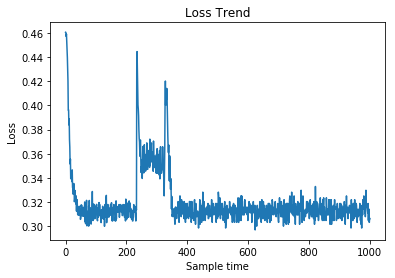

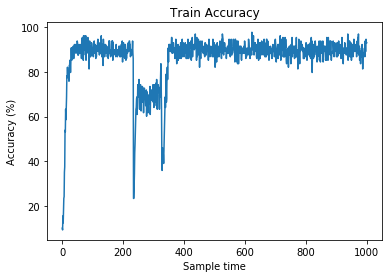

In [7]:
plt.title('Loss Trend')

plt.plot(losses)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [8]:
def test(model, config, input_length):
    # Initialize the dataset and data loader (leave the +1)
    dataset = PalindromeDataset(input_length+1)
    data_loader = DataLoader(dataset, config.batch_size, num_workers=1)
    accuracies = []
    
    for step, (batch_inputs, batch_targets) in enumerate(data_loader):
        outputs = model(batch_inputs)
        accu = 0.0  
        
        if step % 10 == 0:
            accu = accuracy(outputs, batch_targets)
            accuracies.append(accu)
            
        if step == 2000:
            # If you receive a PyTorch data-loader error, check this bug report:
            # https://github.com/pytorch/pytorch/pull/9655
            break

    print('Done testing.')
    
    return accuracies

In [9]:
test_accuracies = test(model, config, config.input_length)

Done testing.


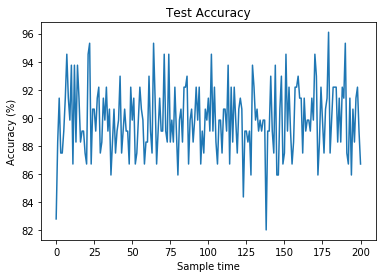

Palindromes Length: T = 11
Average accuracy over 2000 sampled test: 89.87484452736318 %


In [10]:
plt.title('Test Accuracy')

plt.plot(test_accuracies)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 11")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies)) + " %")

## Part3, Task2

In this case, I train and test the RNN model with the Palindromes' length of 5, 15, 20, 25 (T = 5, 15, 20, 25).

As is shown below, when T = 5, the training and testing accuracy can achieve 100%. But when T gets larger(T = 25), the training accuracy is abour 10% and the average testing accuracy is only 9.94%.

#### T = 5:

In [12]:
model2, losses2, accuracies2 = train(config, 4)

__main__:33: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4599
Accuracy on training dataset: 11.719 %
[step:    10] loss: 0.4505
Accuracy on training dataset: 19.531 %
[step:    20] loss: 0.4419
Accuracy on training dataset: 23.438 %
[step:    30] loss: 0.4348
Accuracy on training dataset: 31.250 %
[step:    40] loss: 0.4312
Accuracy on training dataset: 33.594 %
[step:    50] loss: 0.4291
Accuracy on training dataset: 31.250 %
[step:    60] loss: 0.4154
Accuracy on training dataset: 47.656 %
[step:    70] loss: 0.4223
Accuracy on training dataset: 37.500 %
[step:    80] loss: 0.4107
Accuracy on training dataset: 49.219 %
[step:    90] loss: 0.4083
Accuracy on training dataset: 43.750 %
[step:   100] loss: 0.3980
Accuracy on training dataset: 47.656 %
[step:   110] loss: 0.3821
Accuracy on training dataset: 63.281 %
[step:   120] loss: 0.3907
Accuracy on training dataset: 56.250 %
[step:   130] loss: 0.3653
Accuracy on training dataset: 65.625 %
[step:   140] loss: 0.3659
Accuracy on training dataset: 70.312 %
[step:   1

[step:  1260] loss: 0.3558
Accuracy on training dataset: 67.188 %
[step:  1270] loss: 0.3453
Accuracy on training dataset: 72.656 %
[step:  1280] loss: 0.3452
Accuracy on training dataset: 72.656 %
[step:  1290] loss: 0.3618
Accuracy on training dataset: 64.062 %
[step:  1300] loss: 0.3497
Accuracy on training dataset: 70.312 %
[step:  1310] loss: 0.3466
Accuracy on training dataset: 71.875 %
[step:  1320] loss: 0.3496
Accuracy on training dataset: 70.312 %
[step:  1330] loss: 0.3512
Accuracy on training dataset: 69.531 %
[step:  1340] loss: 0.3632
Accuracy on training dataset: 63.281 %
[step:  1350] loss: 0.3496
Accuracy on training dataset: 70.312 %
[step:  1360] loss: 0.3346
Accuracy on training dataset: 78.125 %
[step:  1370] loss: 0.3481
Accuracy on training dataset: 71.094 %
[step:  1380] loss: 0.3526
Accuracy on training dataset: 68.750 %
[step:  1390] loss: 0.3270
Accuracy on training dataset: 82.031 %
[step:  1400] loss: 0.3616
Accuracy on training dataset: 64.062 %
[step:  14

[step:  2510] loss: 0.3228
Accuracy on training dataset: 84.375 %
[step:  2520] loss: 0.3332
Accuracy on training dataset: 78.906 %
[step:  2530] loss: 0.3286
Accuracy on training dataset: 81.250 %
[step:  2540] loss: 0.3241
Accuracy on training dataset: 83.594 %
[step:  2550] loss: 0.3210
Accuracy on training dataset: 85.156 %
[step:  2560] loss: 0.3360
Accuracy on training dataset: 77.344 %
[step:  2570] loss: 0.3315
Accuracy on training dataset: 79.688 %
[step:  2580] loss: 0.3330
Accuracy on training dataset: 78.906 %
[step:  2590] loss: 0.3315
Accuracy on training dataset: 79.688 %
[step:  2600] loss: 0.3255
Accuracy on training dataset: 82.812 %
[step:  2610] loss: 0.3420
Accuracy on training dataset: 74.219 %
[step:  2620] loss: 0.3239
Accuracy on training dataset: 83.594 %
[step:  2630] loss: 0.3345
Accuracy on training dataset: 78.125 %
[step:  2640] loss: 0.3375
Accuracy on training dataset: 76.562 %
[step:  2650] loss: 0.3300
Accuracy on training dataset: 80.469 %
[step:  26

[step:  3770] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3780] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3790] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3800] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3810] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3820] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3830] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3840] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3850] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3860] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3870] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3880] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3890] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3900] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3910] loss: 0.2923
Accuracy on training dataset: 100.0

[step:  5030] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5040] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5050] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5060] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5070] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5080] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5090] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5100] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5110] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5120] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5130] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5140] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5150] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5160] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  5170] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  6270] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6280] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6290] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6300] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6310] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6320] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6330] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6340] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6350] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6360] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6370] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6380] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6390] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6400] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6410] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  7500] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7510] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7520] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7530] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7540] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7550] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7560] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7570] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7580] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7590] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7600] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7610] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7620] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7630] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7640] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  8740] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8750] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8760] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8770] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8780] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8790] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8800] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8810] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8820] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8830] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8840] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8850] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8860] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8870] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8880] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  9980] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9990] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step: 10000] loss: 0.2922
Accuracy on training dataset: 100.000 %
Done training.


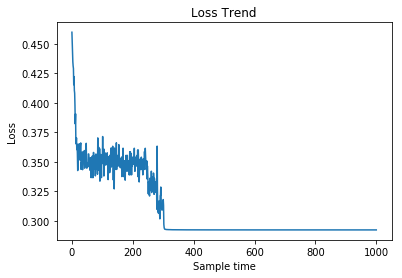

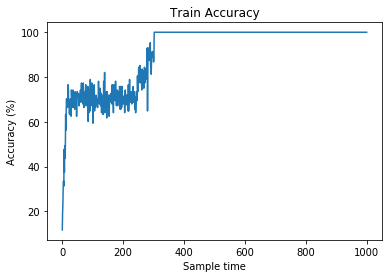

In [13]:
plt.title('Loss Trend')

plt.plot(losses2)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies2)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [14]:
test_accuracies2 = test(model2, config, 4)

Done testing.


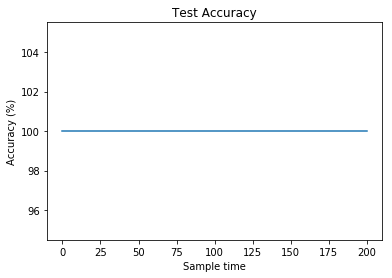

Palindromes Length: T = 5
Average accuracy over 2000 sampled test: 100.0 %


In [15]:
plt.title('Test Accuracy')

plt.plot(test_accuracies2)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 5")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies2)) + " %")

#### T = 15:

In [20]:
def train_2(config, input_length,learning_rate):

    # Initialize the model that we are going to use
    model = VanillaRNN(input_length, config.input_dim, config.num_hidden, config.num_classes, config.batch_size)  # fixme

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Initialize the dataset and data loader (leave the +1)
    dataset = PalindromeDataset(input_length+1)
    data_loader = DataLoader(dataset, config.batch_size, num_workers=1)

    # Setup the loss and optimizer
    criterion = nn.CrossEntropyLoss()  # fixme
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # fixme
    
    losses = []
    accuracies = []
    loss = 0.0

    for step, (batch_inputs, batch_targets) in enumerate(data_loader):

        # Add more code here ...
        optimizer.zero_grad() 
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)   

        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()

        # the following line is to deal with exploding gradients
        torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)

        # Add more code here ...

        loss += loss.item()   # fixme
        accu = 0.0  # fixme
        

        if step % 10 == 0:
            # print acuracy/loss here
            print('[step: %5d] loss: %.4f' %
                          (step, loss / 10))
            losses.append(loss / 10)
            loss = 0.0
            accu = accuracy(outputs, batch_targets)
            accuracies.append(accu)
            print('Accuracy on training dataset: %.3f %%' % (accu))
            

        if step == config.train_steps:
            # If you receive a PyTorch data-loader error, check this bug report:
            # https://github.com/pytorch/pytorch/pull/9655
            break

    print('Done training.')
    
    return model, losses, accuracies

In [22]:
model3, losses3, accuracies3 = train_2(config, 14, 0.0004)

__main__:33: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4605
Accuracy on training dataset: 11.719 %
[step:    10] loss: 0.4620
Accuracy on training dataset: 6.250 %
[step:    20] loss: 0.4597
Accuracy on training dataset: 12.500 %
[step:    30] loss: 0.4608
Accuracy on training dataset: 10.938 %
[step:    40] loss: 0.4613
Accuracy on training dataset: 8.594 %
[step:    50] loss: 0.4618
Accuracy on training dataset: 9.375 %
[step:    60] loss: 0.4613
Accuracy on training dataset: 8.594 %
[step:    70] loss: 0.4599
Accuracy on training dataset: 6.250 %
[step:    80] loss: 0.4596
Accuracy on training dataset: 17.188 %
[step:    90] loss: 0.4596
Accuracy on training dataset: 12.500 %
[step:   100] loss: 0.4620
Accuracy on training dataset: 7.812 %
[step:   110] loss: 0.4603
Accuracy on training dataset: 14.844 %
[step:   120] loss: 0.4608
Accuracy on training dataset: 14.844 %
[step:   130] loss: 0.4575
Accuracy on training dataset: 20.312 %
[step:   140] loss: 0.4553
Accuracy on training dataset: 18.750 %
[step:   150] lo

[step:  1250] loss: 0.3086
Accuracy on training dataset: 92.188 %
[step:  1260] loss: 0.3087
Accuracy on training dataset: 92.188 %
[step:  1270] loss: 0.3087
Accuracy on training dataset: 92.188 %
[step:  1280] loss: 0.3145
Accuracy on training dataset: 89.062 %
[step:  1290] loss: 0.3085
Accuracy on training dataset: 92.188 %
[step:  1300] loss: 0.3129
Accuracy on training dataset: 89.844 %
[step:  1310] loss: 0.3099
Accuracy on training dataset: 91.406 %
[step:  1320] loss: 0.3190
Accuracy on training dataset: 86.719 %
[step:  1330] loss: 0.3203
Accuracy on training dataset: 85.938 %
[step:  1340] loss: 0.3023
Accuracy on training dataset: 95.312 %
[step:  1350] loss: 0.3143
Accuracy on training dataset: 89.062 %
[step:  1360] loss: 0.3097
Accuracy on training dataset: 91.406 %
[step:  1370] loss: 0.3128
Accuracy on training dataset: 89.844 %
[step:  1380] loss: 0.3128
Accuracy on training dataset: 89.844 %
[step:  1390] loss: 0.3068
Accuracy on training dataset: 92.969 %
[step:  14

[step:  2500] loss: 0.3045
Accuracy on training dataset: 93.750 %
[step:  2510] loss: 0.3090
Accuracy on training dataset: 91.406 %
[step:  2520] loss: 0.3181
Accuracy on training dataset: 86.719 %
[step:  2530] loss: 0.3060
Accuracy on training dataset: 92.969 %
[step:  2540] loss: 0.3045
Accuracy on training dataset: 93.750 %
[step:  2550] loss: 0.3090
Accuracy on training dataset: 91.406 %
[step:  2560] loss: 0.3090
Accuracy on training dataset: 91.406 %
[step:  2570] loss: 0.3090
Accuracy on training dataset: 91.406 %
[step:  2580] loss: 0.3105
Accuracy on training dataset: 90.625 %
[step:  2590] loss: 0.3076
Accuracy on training dataset: 92.188 %
[step:  2600] loss: 0.3150
Accuracy on training dataset: 88.281 %
[step:  2610] loss: 0.3150
Accuracy on training dataset: 88.281 %
[step:  2620] loss: 0.3180
Accuracy on training dataset: 86.719 %
[step:  2630] loss: 0.3225
Accuracy on training dataset: 84.375 %
[step:  2640] loss: 0.3045
Accuracy on training dataset: 93.750 %
[step:  26

[step:  3760] loss: 0.3119
Accuracy on training dataset: 89.844 %
[step:  3770] loss: 0.3149
Accuracy on training dataset: 88.281 %
[step:  3780] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  3790] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  3800] loss: 0.3149
Accuracy on training dataset: 88.281 %
[step:  3810] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  3820] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  3830] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  3840] loss: 0.3285
Accuracy on training dataset: 81.250 %
[step:  3850] loss: 0.3119
Accuracy on training dataset: 89.844 %
[step:  3860] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  3870] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  3880] loss: 0.3074
Accuracy on training dataset: 92.188 %
[step:  3890] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  3900] loss: 0.3119
Accuracy on training dataset: 89.844 %
[step:  39

[step:  5020] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  5030] loss: 0.3073
Accuracy on training dataset: 92.188 %
[step:  5040] loss: 0.3194
Accuracy on training dataset: 85.938 %
[step:  5050] loss: 0.3239
Accuracy on training dataset: 83.594 %
[step:  5060] loss: 0.3073
Accuracy on training dataset: 92.188 %
[step:  5070] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  5080] loss: 0.3103
Accuracy on training dataset: 90.625 %
[step:  5090] loss: 0.3118
Accuracy on training dataset: 89.844 %
[step:  5100] loss: 0.3073
Accuracy on training dataset: 92.188 %
[step:  5110] loss: 0.3118
Accuracy on training dataset: 89.844 %
[step:  5120] loss: 0.3133
Accuracy on training dataset: 89.062 %
[step:  5130] loss: 0.3043
Accuracy on training dataset: 93.750 %
[step:  5140] loss: 0.3043
Accuracy on training dataset: 93.750 %
[step:  5150] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  5160] loss: 0.3179
Accuracy on training dataset: 86.719 %
[step:  51

[step:  6280] loss: 0.3103
Accuracy on training dataset: 90.625 %
[step:  6290] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  6300] loss: 0.3088
Accuracy on training dataset: 91.406 %
[step:  6310] loss: 0.3224
Accuracy on training dataset: 84.375 %
[step:  6320] loss: 0.3116
Accuracy on training dataset: 90.625 %
[step:  6330] loss: 0.4739
Accuracy on training dataset: 8.594 %
[step:  6340] loss: 0.4744
Accuracy on training dataset: 8.594 %
[step:  6350] loss: 0.4757
Accuracy on training dataset: 7.812 %
[step:  6360] loss: 0.4683
Accuracy on training dataset: 10.156 %
[step:  6370] loss: 0.4507
Accuracy on training dataset: 20.312 %
[step:  6380] loss: 0.4408
Accuracy on training dataset: 25.000 %
[step:  6390] loss: 0.3991
Accuracy on training dataset: 46.875 %
[step:  6400] loss: 0.3864
Accuracy on training dataset: 50.000 %
[step:  6410] loss: 0.3804
Accuracy on training dataset: 56.250 %
[step:  6420] loss: 0.3561
Accuracy on training dataset: 69.531 %
[step:  6430]

[step:  7540] loss: 0.3384
Accuracy on training dataset: 76.562 %
[step:  7550] loss: 0.3333
Accuracy on training dataset: 78.125 %
[step:  7560] loss: 0.3318
Accuracy on training dataset: 83.594 %
[step:  7570] loss: 0.3166
Accuracy on training dataset: 89.844 %
[step:  7580] loss: 0.3146
Accuracy on training dataset: 90.625 %
[step:  7590] loss: 0.3082
Accuracy on training dataset: 92.969 %
[step:  7600] loss: 0.3230
Accuracy on training dataset: 85.156 %
[step:  7610] loss: 0.3153
Accuracy on training dataset: 89.062 %
[step:  7620] loss: 0.3122
Accuracy on training dataset: 90.625 %
[step:  7630] loss: 0.3011
Accuracy on training dataset: 96.094 %
[step:  7640] loss: 0.3121
Accuracy on training dataset: 90.625 %
[step:  7650] loss: 0.3166
Accuracy on training dataset: 88.281 %
[step:  7660] loss: 0.3179
Accuracy on training dataset: 87.500 %
[step:  7670] loss: 0.3210
Accuracy on training dataset: 85.938 %
[step:  7680] loss: 0.3241
Accuracy on training dataset: 84.375 %
[step:  76

[step:  8800] loss: 0.3220
Accuracy on training dataset: 85.156 %
[step:  8810] loss: 0.3126
Accuracy on training dataset: 89.844 %
[step:  8820] loss: 0.3126
Accuracy on training dataset: 89.844 %
[step:  8830] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  8840] loss: 0.3189
Accuracy on training dataset: 86.719 %
[step:  8850] loss: 0.3157
Accuracy on training dataset: 88.281 %
[step:  8860] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  8870] loss: 0.3032
Accuracy on training dataset: 94.531 %
[step:  8880] loss: 0.3267
Accuracy on training dataset: 82.812 %
[step:  8890] loss: 0.3220
Accuracy on training dataset: 85.156 %
[step:  8900] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  8910] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  8920] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  8930] loss: 0.3079
Accuracy on training dataset: 92.188 %
[step:  8940] loss: 0.3110
Accuracy on training dataset: 90.625 %
[step:  89

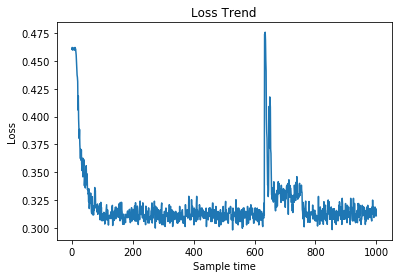

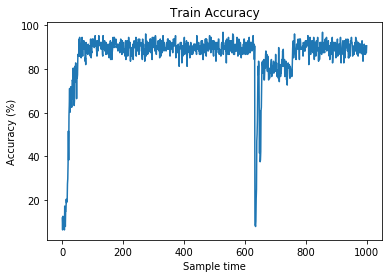

In [23]:
plt.title('Loss Trend')

plt.plot(losses3)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies3)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [24]:
test_accuracies3 = test(model3, config, 14)

Done testing.


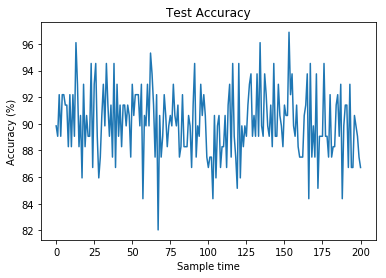

Palindromes Length: T = 15
Average accuracy over 2000 sampled test: 90.09250621890547 %


In [25]:
plt.title('Test Accuracy')

plt.plot(test_accuracies3)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 15")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies3)) + " %")

#### T = 20:

In [26]:
model4, losses4, accuracies4 = train_2(config, 19, 0.0002)

__main__:33: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4613
Accuracy on training dataset: 11.719 %
[step:    10] loss: 0.4633
Accuracy on training dataset: 6.250 %
[step:    20] loss: 0.4613
Accuracy on training dataset: 7.031 %
[step:    30] loss: 0.4623
Accuracy on training dataset: 7.812 %
[step:    40] loss: 0.4628
Accuracy on training dataset: 9.375 %
[step:    50] loss: 0.4599
Accuracy on training dataset: 6.250 %
[step:    60] loss: 0.4597
Accuracy on training dataset: 15.625 %
[step:    70] loss: 0.4606
Accuracy on training dataset: 6.250 %
[step:    80] loss: 0.4612
Accuracy on training dataset: 7.031 %
[step:    90] loss: 0.4608
Accuracy on training dataset: 11.719 %
[step:   100] loss: 0.4621
Accuracy on training dataset: 7.031 %
[step:   110] loss: 0.4599
Accuracy on training dataset: 8.594 %
[step:   120] loss: 0.4615
Accuracy on training dataset: 10.938 %
[step:   130] loss: 0.4604
Accuracy on training dataset: 8.594 %
[step:   140] loss: 0.4607
Accuracy on training dataset: 5.469 %
[step:   150] loss: 0

[step:  1250] loss: 0.3585
Accuracy on training dataset: 67.188 %
[step:  1260] loss: 0.3477
Accuracy on training dataset: 72.656 %
[step:  1270] loss: 0.3460
Accuracy on training dataset: 73.438 %
[step:  1280] loss: 0.3462
Accuracy on training dataset: 73.438 %
[step:  1290] loss: 0.3552
Accuracy on training dataset: 68.750 %
[step:  1300] loss: 0.3624
Accuracy on training dataset: 64.844 %
[step:  1310] loss: 0.3371
Accuracy on training dataset: 78.125 %
[step:  1320] loss: 0.3612
Accuracy on training dataset: 65.625 %
[step:  1330] loss: 0.3535
Accuracy on training dataset: 69.531 %
[step:  1340] loss: 0.3584
Accuracy on training dataset: 67.188 %
[step:  1350] loss: 0.3608
Accuracy on training dataset: 65.625 %
[step:  1360] loss: 0.3423
Accuracy on training dataset: 75.781 %
[step:  1370] loss: 0.3532
Accuracy on training dataset: 69.531 %
[step:  1380] loss: 0.3592
Accuracy on training dataset: 66.406 %
[step:  1390] loss: 0.3597
Accuracy on training dataset: 66.406 %
[step:  14

[step:  2500] loss: 0.3397
Accuracy on training dataset: 75.781 %
[step:  2510] loss: 0.3578
Accuracy on training dataset: 66.406 %
[step:  2520] loss: 0.3533
Accuracy on training dataset: 68.750 %
[step:  2530] loss: 0.3594
Accuracy on training dataset: 65.625 %
[step:  2540] loss: 0.3457
Accuracy on training dataset: 72.656 %
[step:  2550] loss: 0.3397
Accuracy on training dataset: 75.781 %
[step:  2560] loss: 0.3426
Accuracy on training dataset: 74.219 %
[step:  2570] loss: 0.3533
Accuracy on training dataset: 68.750 %
[step:  2580] loss: 0.3532
Accuracy on training dataset: 68.750 %
[step:  2590] loss: 0.3472
Accuracy on training dataset: 71.875 %
[step:  2600] loss: 0.3684
Accuracy on training dataset: 60.938 %
[step:  2610] loss: 0.3593
Accuracy on training dataset: 65.625 %
[step:  2620] loss: 0.3396
Accuracy on training dataset: 75.781 %
[step:  2630] loss: 0.3487
Accuracy on training dataset: 71.094 %
[step:  2640] loss: 0.3503
Accuracy on training dataset: 70.312 %
[step:  26

[step:  3750] loss: 0.3490
Accuracy on training dataset: 71.094 %
[step:  3760] loss: 0.3323
Accuracy on training dataset: 79.688 %
[step:  3770] loss: 0.3292
Accuracy on training dataset: 81.250 %
[step:  3780] loss: 0.3356
Accuracy on training dataset: 78.125 %
[step:  3790] loss: 0.3294
Accuracy on training dataset: 81.250 %
[step:  3800] loss: 0.3383
Accuracy on training dataset: 76.562 %
[step:  3810] loss: 0.3218
Accuracy on training dataset: 85.156 %
[step:  3820] loss: 0.3308
Accuracy on training dataset: 80.469 %
[step:  3830] loss: 0.3427
Accuracy on training dataset: 74.219 %
[step:  3840] loss: 0.3353
Accuracy on training dataset: 78.125 %
[step:  3850] loss: 0.3384
Accuracy on training dataset: 76.562 %
[step:  3860] loss: 0.3354
Accuracy on training dataset: 78.125 %
[step:  3870] loss: 0.3112
Accuracy on training dataset: 90.625 %
[step:  3880] loss: 0.3292
Accuracy on training dataset: 81.250 %
[step:  3890] loss: 0.3245
Accuracy on training dataset: 83.594 %
[step:  39

[step:  5000] loss: 0.3213
Accuracy on training dataset: 85.156 %
[step:  5010] loss: 0.3108
Accuracy on training dataset: 90.625 %
[step:  5020] loss: 0.3123
Accuracy on training dataset: 89.844 %
[step:  5030] loss: 0.3138
Accuracy on training dataset: 89.062 %
[step:  5040] loss: 0.3122
Accuracy on training dataset: 89.844 %
[step:  5050] loss: 0.3032
Accuracy on training dataset: 94.531 %
[step:  5060] loss: 0.3182
Accuracy on training dataset: 86.719 %
[step:  5070] loss: 0.3183
Accuracy on training dataset: 86.719 %
[step:  5080] loss: 0.3092
Accuracy on training dataset: 91.406 %
[step:  5090] loss: 0.3017
Accuracy on training dataset: 95.312 %
[step:  5100] loss: 0.3167
Accuracy on training dataset: 87.500 %
[step:  5110] loss: 0.3212
Accuracy on training dataset: 85.156 %
[step:  5120] loss: 0.3017
Accuracy on training dataset: 95.312 %
[step:  5130] loss: 0.3107
Accuracy on training dataset: 90.625 %
[step:  5140] loss: 0.3062
Accuracy on training dataset: 92.969 %
[step:  51

[step:  6250] loss: 0.3090
Accuracy on training dataset: 91.406 %
[step:  6260] loss: 0.3135
Accuracy on training dataset: 89.062 %
[step:  6270] loss: 0.3180
Accuracy on training dataset: 86.719 %
[step:  6280] loss: 0.3105
Accuracy on training dataset: 90.625 %
[step:  6290] loss: 0.3029
Accuracy on training dataset: 94.531 %
[step:  6300] loss: 0.3075
Accuracy on training dataset: 92.188 %
[step:  6310] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  6320] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  6330] loss: 0.3120
Accuracy on training dataset: 89.844 %
[step:  6340] loss: 0.3180
Accuracy on training dataset: 86.719 %
[step:  6350] loss: 0.3179
Accuracy on training dataset: 86.719 %
[step:  6360] loss: 0.3074
Accuracy on training dataset: 92.188 %
[step:  6370] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  6380] loss: 0.3104
Accuracy on training dataset: 90.625 %
[step:  6390] loss: 0.3014
Accuracy on training dataset: 95.312 %
[step:  64

[step:  7500] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  7510] loss: 0.3104
Accuracy on training dataset: 90.625 %
[step:  7520] loss: 0.3059
Accuracy on training dataset: 92.969 %
[step:  7530] loss: 0.3134
Accuracy on training dataset: 89.062 %
[step:  7540] loss: 0.3104
Accuracy on training dataset: 90.625 %
[step:  7550] loss: 0.3179
Accuracy on training dataset: 86.719 %
[step:  7560] loss: 0.3059
Accuracy on training dataset: 92.969 %
[step:  7570] loss: 0.3104
Accuracy on training dataset: 90.625 %
[step:  7580] loss: 0.3119
Accuracy on training dataset: 89.844 %
[step:  7590] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  7600] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  7610] loss: 0.3043
Accuracy on training dataset: 93.750 %
[step:  7620] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  7630] loss: 0.3043
Accuracy on training dataset: 93.750 %
[step:  7640] loss: 0.3194
Accuracy on training dataset: 85.938 %
[step:  76

[step:  8750] loss: 0.3028
Accuracy on training dataset: 94.531 %
[step:  8760] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  8770] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  8780] loss: 0.3149
Accuracy on training dataset: 88.281 %
[step:  8790] loss: 0.3089
Accuracy on training dataset: 91.406 %
[step:  8800] loss: 0.3149
Accuracy on training dataset: 88.281 %
[step:  8810] loss: 0.3224
Accuracy on training dataset: 84.375 %
[step:  8820] loss: 0.3119
Accuracy on training dataset: 89.844 %
[step:  8830] loss: 0.3073
Accuracy on training dataset: 92.188 %
[step:  8840] loss: 0.3119
Accuracy on training dataset: 89.844 %
[step:  8850] loss: 0.3149
Accuracy on training dataset: 88.281 %
[step:  8860] loss: 0.3104
Accuracy on training dataset: 90.625 %
[step:  8870] loss: 0.3164
Accuracy on training dataset: 87.500 %
[step:  8880] loss: 0.2983
Accuracy on training dataset: 96.875 %
[step:  8890] loss: 0.3074
Accuracy on training dataset: 92.188 %
[step:  89

[step: 10000] loss: 0.3179
Accuracy on training dataset: 86.719 %
Done training.


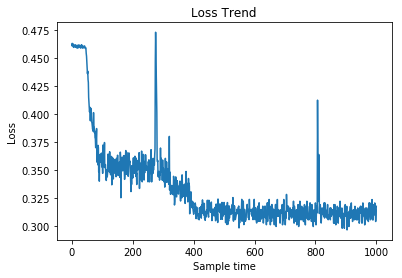

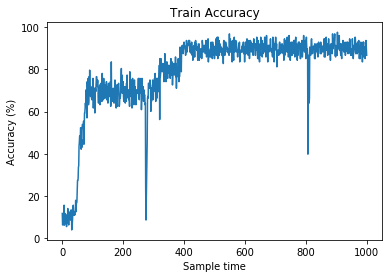

In [27]:
plt.title('Loss Trend')

plt.plot(losses4)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies4)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [28]:
test_accuracies4 = test(model4, config, 19)

Done testing.


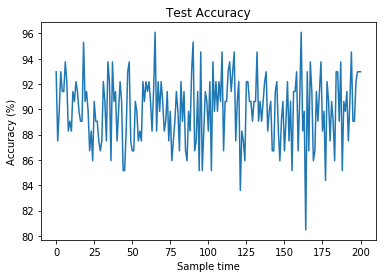

Palindromes Length: T = 20
Average accuracy over 2000 sampled test: 89.97978855721394 %


In [29]:
plt.title('Test Accuracy')

plt.plot(test_accuracies4)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 20")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies4)) + " %")

#### T = 25:

In [30]:
model5, losses5, accuracies5 = train_2(config, 24, 0.0001)

__main__:33: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4612
Accuracy on training dataset: 14.844 %
[step:    10] loss: 0.4624
Accuracy on training dataset: 7.812 %
[step:    20] loss: 0.4599
Accuracy on training dataset: 10.938 %
[step:    30] loss: 0.4614
Accuracy on training dataset: 7.812 %
[step:    40] loss: 0.4600
Accuracy on training dataset: 11.719 %
[step:    50] loss: 0.4610
Accuracy on training dataset: 7.812 %
[step:    60] loss: 0.4644
Accuracy on training dataset: 4.688 %
[step:    70] loss: 0.4617
Accuracy on training dataset: 7.031 %
[step:    80] loss: 0.4613
Accuracy on training dataset: 9.375 %
[step:    90] loss: 0.4603
Accuracy on training dataset: 9.375 %
[step:   100] loss: 0.4626
Accuracy on training dataset: 3.125 %
[step:   110] loss: 0.4607
Accuracy on training dataset: 16.406 %
[step:   120] loss: 0.4598
Accuracy on training dataset: 11.719 %
[step:   130] loss: 0.4599
Accuracy on training dataset: 11.719 %
[step:   140] loss: 0.4591
Accuracy on training dataset: 10.156 %
[step:   150] loss

[step:  1260] loss: 0.4608
Accuracy on training dataset: 7.031 %
[step:  1270] loss: 0.4598
Accuracy on training dataset: 12.500 %
[step:  1280] loss: 0.4601
Accuracy on training dataset: 7.031 %
[step:  1290] loss: 0.4609
Accuracy on training dataset: 6.250 %
[step:  1300] loss: 0.4605
Accuracy on training dataset: 11.719 %
[step:  1310] loss: 0.4606
Accuracy on training dataset: 13.281 %
[step:  1320] loss: 0.4614
Accuracy on training dataset: 8.594 %
[step:  1330] loss: 0.4608
Accuracy on training dataset: 13.281 %
[step:  1340] loss: 0.4614
Accuracy on training dataset: 10.156 %
[step:  1350] loss: 0.4617
Accuracy on training dataset: 8.594 %
[step:  1360] loss: 0.4598
Accuracy on training dataset: 6.250 %
[step:  1370] loss: 0.4608
Accuracy on training dataset: 5.469 %
[step:  1380] loss: 0.4610
Accuracy on training dataset: 11.719 %
[step:  1390] loss: 0.4613
Accuracy on training dataset: 8.594 %
[step:  1400] loss: 0.4609
Accuracy on training dataset: 7.812 %
[step:  1410] loss:

[step:  2520] loss: 0.4608
Accuracy on training dataset: 10.938 %
[step:  2530] loss: 0.4611
Accuracy on training dataset: 6.250 %
[step:  2540] loss: 0.4596
Accuracy on training dataset: 15.625 %
[step:  2550] loss: 0.4602
Accuracy on training dataset: 10.938 %
[step:  2560] loss: 0.4605
Accuracy on training dataset: 9.375 %
[step:  2570] loss: 0.4605
Accuracy on training dataset: 12.500 %
[step:  2580] loss: 0.4606
Accuracy on training dataset: 7.031 %
[step:  2590] loss: 0.4608
Accuracy on training dataset: 8.594 %
[step:  2600] loss: 0.4610
Accuracy on training dataset: 9.375 %
[step:  2610] loss: 0.4602
Accuracy on training dataset: 9.375 %
[step:  2620] loss: 0.4604
Accuracy on training dataset: 9.375 %
[step:  2630] loss: 0.4601
Accuracy on training dataset: 12.500 %
[step:  2640] loss: 0.4602
Accuracy on training dataset: 8.594 %
[step:  2650] loss: 0.4607
Accuracy on training dataset: 8.594 %
[step:  2660] loss: 0.4604
Accuracy on training dataset: 7.031 %
[step:  2670] loss: 

[step:  3780] loss: 0.4603
Accuracy on training dataset: 10.156 %
[step:  3790] loss: 0.4604
Accuracy on training dataset: 11.719 %
[step:  3800] loss: 0.4604
Accuracy on training dataset: 8.594 %
[step:  3810] loss: 0.4614
Accuracy on training dataset: 7.812 %
[step:  3820] loss: 0.4601
Accuracy on training dataset: 10.938 %
[step:  3830] loss: 0.4608
Accuracy on training dataset: 8.594 %
[step:  3840] loss: 0.4606
Accuracy on training dataset: 11.719 %
[step:  3850] loss: 0.4608
Accuracy on training dataset: 7.812 %
[step:  3860] loss: 0.4602
Accuracy on training dataset: 16.406 %
[step:  3870] loss: 0.4610
Accuracy on training dataset: 7.812 %
[step:  3880] loss: 0.4605
Accuracy on training dataset: 12.500 %
[step:  3890] loss: 0.4602
Accuracy on training dataset: 11.719 %
[step:  3900] loss: 0.4604
Accuracy on training dataset: 8.594 %
[step:  3910] loss: 0.4606
Accuracy on training dataset: 6.250 %
[step:  3920] loss: 0.4609
Accuracy on training dataset: 7.812 %
[step:  3930] loss

[step:  5040] loss: 0.4612
Accuracy on training dataset: 8.594 %
[step:  5050] loss: 0.4609
Accuracy on training dataset: 7.812 %
[step:  5060] loss: 0.4600
Accuracy on training dataset: 10.938 %
[step:  5070] loss: 0.4611
Accuracy on training dataset: 9.375 %
[step:  5080] loss: 0.4607
Accuracy on training dataset: 14.062 %
[step:  5090] loss: 0.4603
Accuracy on training dataset: 10.938 %
[step:  5100] loss: 0.4603
Accuracy on training dataset: 12.500 %
[step:  5110] loss: 0.4610
Accuracy on training dataset: 7.812 %
[step:  5120] loss: 0.4608
Accuracy on training dataset: 6.250 %
[step:  5130] loss: 0.4601
Accuracy on training dataset: 14.844 %
[step:  5140] loss: 0.4606
Accuracy on training dataset: 11.719 %
[step:  5150] loss: 0.4610
Accuracy on training dataset: 11.719 %
[step:  5160] loss: 0.4605
Accuracy on training dataset: 10.938 %
[step:  5170] loss: 0.4609
Accuracy on training dataset: 4.688 %
[step:  5180] loss: 0.4610
Accuracy on training dataset: 9.375 %
[step:  5190] los

[step:  6300] loss: 0.4605
Accuracy on training dataset: 7.031 %
[step:  6310] loss: 0.4606
Accuracy on training dataset: 9.375 %
[step:  6320] loss: 0.4605
Accuracy on training dataset: 6.250 %
[step:  6330] loss: 0.4606
Accuracy on training dataset: 10.156 %
[step:  6340] loss: 0.4600
Accuracy on training dataset: 12.500 %
[step:  6350] loss: 0.4605
Accuracy on training dataset: 14.062 %
[step:  6360] loss: 0.4600
Accuracy on training dataset: 13.281 %
[step:  6370] loss: 0.4605
Accuracy on training dataset: 7.031 %
[step:  6380] loss: 0.4612
Accuracy on training dataset: 9.375 %
[step:  6390] loss: 0.4600
Accuracy on training dataset: 10.938 %
[step:  6400] loss: 0.4603
Accuracy on training dataset: 11.719 %
[step:  6410] loss: 0.4607
Accuracy on training dataset: 11.719 %
[step:  6420] loss: 0.4601
Accuracy on training dataset: 7.812 %
[step:  6430] loss: 0.4602
Accuracy on training dataset: 7.031 %
[step:  6440] loss: 0.4608
Accuracy on training dataset: 7.031 %
[step:  6450] loss

[step:  7560] loss: 0.4606
Accuracy on training dataset: 9.375 %
[step:  7570] loss: 0.4610
Accuracy on training dataset: 7.812 %
[step:  7580] loss: 0.4607
Accuracy on training dataset: 8.594 %
[step:  7590] loss: 0.4607
Accuracy on training dataset: 11.719 %
[step:  7600] loss: 0.4605
Accuracy on training dataset: 8.594 %
[step:  7610] loss: 0.4606
Accuracy on training dataset: 8.594 %
[step:  7620] loss: 0.4613
Accuracy on training dataset: 7.812 %
[step:  7630] loss: 0.4603
Accuracy on training dataset: 10.156 %
[step:  7640] loss: 0.4611
Accuracy on training dataset: 9.375 %
[step:  7650] loss: 0.4602
Accuracy on training dataset: 10.156 %
[step:  7660] loss: 0.4610
Accuracy on training dataset: 9.375 %
[step:  7670] loss: 0.4611
Accuracy on training dataset: 7.031 %
[step:  7680] loss: 0.4605
Accuracy on training dataset: 11.719 %
[step:  7690] loss: 0.4602
Accuracy on training dataset: 9.375 %
[step:  7700] loss: 0.4603
Accuracy on training dataset: 8.594 %
[step:  7710] loss: 0

[step:  8820] loss: 0.4606
Accuracy on training dataset: 11.719 %
[step:  8830] loss: 0.4608
Accuracy on training dataset: 4.688 %
[step:  8840] loss: 0.4605
Accuracy on training dataset: 8.594 %
[step:  8850] loss: 0.4609
Accuracy on training dataset: 10.938 %
[step:  8860] loss: 0.4602
Accuracy on training dataset: 16.406 %
[step:  8870] loss: 0.4606
Accuracy on training dataset: 10.156 %
[step:  8880] loss: 0.4606
Accuracy on training dataset: 8.594 %
[step:  8890] loss: 0.4605
Accuracy on training dataset: 7.031 %
[step:  8900] loss: 0.4606
Accuracy on training dataset: 7.812 %
[step:  8910] loss: 0.4603
Accuracy on training dataset: 7.812 %
[step:  8920] loss: 0.4607
Accuracy on training dataset: 10.938 %
[step:  8930] loss: 0.4607
Accuracy on training dataset: 9.375 %
[step:  8940] loss: 0.4607
Accuracy on training dataset: 9.375 %
[step:  8950] loss: 0.4601
Accuracy on training dataset: 11.719 %
[step:  8960] loss: 0.4608
Accuracy on training dataset: 8.594 %
[step:  8970] loss:

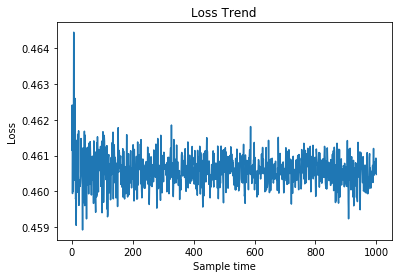

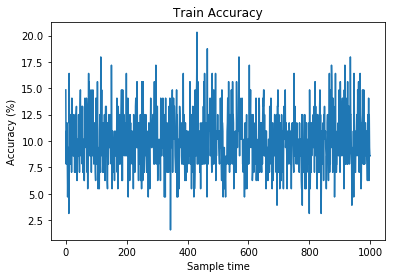

In [31]:
plt.title('Loss Trend')

plt.plot(losses5)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies5)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [32]:
test_accuracies5 = test(model5, config, 24)

Done testing.


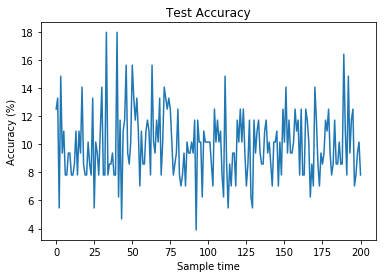

Palindromes Length: T = 25
Average accuracy over 2000 sampled test: 9.94247512437811 %


In [33]:
plt.title('Test Accuracy')

plt.plot(test_accuracies5)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 25")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies5)) + " %")

## Summary 

Here follows a figure which shows the accuracy on test data w.r.t. corresponding palindromes length.


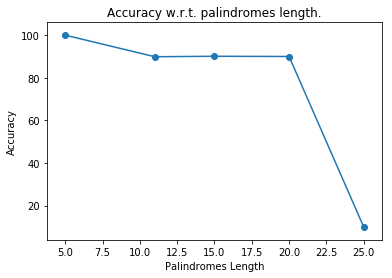

In [36]:
p1 = [5, 11, 15, 20, 25]
p2 = [100, 89.87, 90.09, 89.98, 9.94]

plt.title('Accuracy w.r.t. palindromes length.')
plt.plot(p1,p2)
plt.scatter(p1,p2)
plt.xlabel('Palindromes Length')
    
plt.ylabel('Accuracy')
    
plt.show()